In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

# Check device configurations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create MNIST transform object
transform = transforms.Compose(
    [transforms.ToTensor()])

# Define hyper-parameters
batch_size = 100
input_size = 28**2
num_classes = 10
num_epochs = 20
learning_rate = 0.01

# Establish the MNIST data set and loaders
trainset = torchvision.datasets.MNIST(root='./data',
                                      transform=transform,
                                      train=True,
                                      download=True)
testset = torchvision.datasets.MNIST(root='../../data',
                                     transform=transform,
                                     train=False,
                                     download=True)
trainloader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=batch_size,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=testset,
                                         batch_size=batch_size,
                                         shuffle=False)

# Fully connected neural networks
class NeuralNet1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet1, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)
        self.fc2 = nn.Linear(20, 50)
        self.fc3 = nn.Linear(50, 20)
        self.fc4 = nn.Linear(20, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        out = self.fc4(out)
        return out
class NeuralNet2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, 10)
        self.fc6 = nn.Linear(10, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        out = self.relu(self.fc4(out))
        out = self.relu(self.fc5(out))
        out = self.fc6(out)
        return out
class NeuralNet3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet3, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 40)
        self.fc3 = nn.Linear(40, 70)
        self.fc4 = nn.Linear(70, 40)
        self.fc5 = nn.Linear(40, 10)
        self.fc6 = nn.Linear(10, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        out = self.relu(self.fc4(out))
        out = self.relu(self.fc5(out))
        out = self.fc6(out)
        return out

# Create network models
net1 = NeuralNet1(input_size, num_classes).to(device)
net2 = NeuralNet2(input_size, num_classes).to(device)
net3 = NeuralNet3(input_size, num_classes).to(device)
nets = [net1, net2, net3]

# Train and test each MNIST net first
print('Initiating Training for', len(nets), 'networks')
for net in nets:
    # Initiate timer, TensorBoard writer, loss criterion, and optimizer
    time_start = time.time()
    writer = SummaryWriter()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    # Train model by looping over the dataset per epoch per data
    total_step = len(trainloader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(trainloader):
            # Reshape image data to be properly sent to device
            images = images.reshape(-1, 28**2).to(device)
            labels = labels.to(device)
            # Zero out parameter gradients
            optimizer.zero_grad()
            # Forward pass then backpropagate and optimize
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Print and write progress for every batch
            if (i + 1) % batch_size == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                writer.add_scalar("Loss/train", loss, epoch * len(trainloader) + i)
    # Calculate time it took to train
    time_total = (time.time() - time_start)
    print('Finished Training', str(nets.index(net)+1) + '/' + str(len(nets)), 'in', str(int(time_total//60)) + 'm' + str(int(time_total%60)) + 's')

    # Model testing (gradients are need not computed for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            # Reshape and parse data to device, whether NVIDIA CUDA or CPU
            images = images.reshape(-1, 28**2).to(device)
            labels = labels.to(device)
            # Run the images through the network to get our outputs
            outputs = net(images)
            # Predict the class with the highest energy
            _, predicted = torch.max(outputs.data, 1)
            # Adjust prediction counters and print the given accuracy
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the', len(testloader), 'test images: {} %'.format(100 * correct / total))
    print('Finished Testing', str(nets.index(net)+1) + '/' + str(len(nets)) + '\n')

    # Flush and close TensorBoard writer then save the model checkpoint
    writer.flush()
    writer.close()
    torch.save(net.state_dict(), 'net' + str(nets.index(net)+1) + '.ckpt')


The model that had the least amount of error for validation was the four-layer network, which was the first one tested, at a 95.74% accuracy. The following two, the six-layer networks, had similar accuracies, which were 93.34% and 93.05%. The first model took 2m51s, the second model took 2m16s and the last model took 2m35s. Shown below is a tensor graph of how they performed.

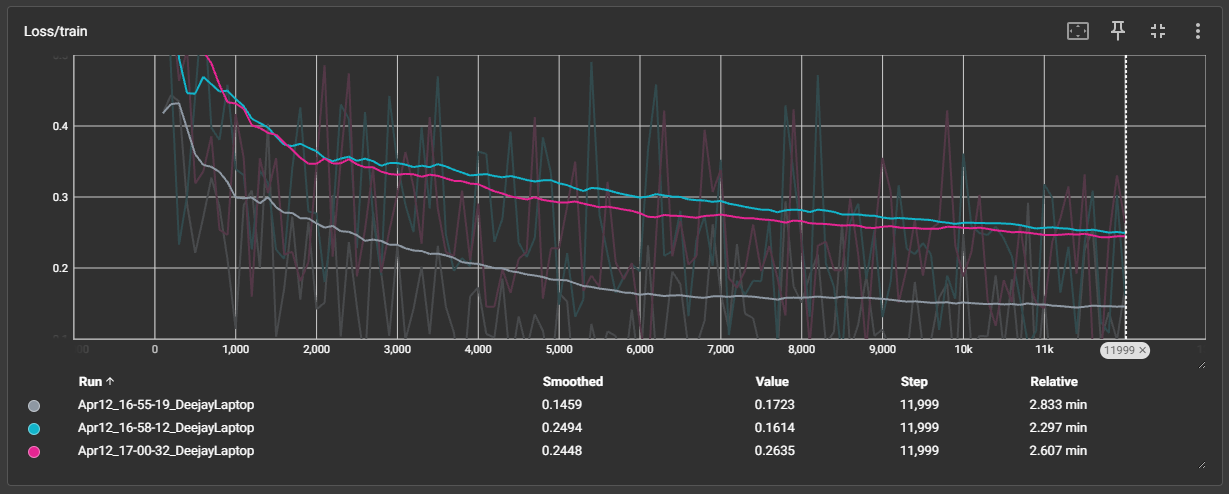